Do tracks in the Pop genre have a mean popularity greater than 60?
Let μ be the true mean popularity of Pop tracks.

Null hypothesis (H₀): μ = 60

Alternative hypothesis (H₁): μ > 60

Significance level: α = 0.05

From your data for Pop tracks:

Sample size: n = 200

Sample mean popularity: 67.98

Sample standard deviation: 19.87

Evidence 1 — One-sample t-test

𝑡
=
𝑥
ˉ
−
𝜇
0
𝑠
/
𝑛
=
67.98
−
60
19.87
/
200
≈
7.93
t=
s/
n
	​

x
ˉ
−μ
0
	​

	​

=
19.87/
200
	​

67.98−60
	​

≈7.93

p-value ≈ 0.0001 (p < 0.05) → reject H₀

Evidence 2 — Confidence Interval

95% CI for mean popularity:

𝑥
ˉ
±
𝑡
0.975
,
199
⋅
𝑠
𝑛
≈
67.98
±
2.78
⇒
(
65.20
,
70.76
)
x
ˉ
±t
0.975,199
	​

⋅
n
	​

s
	​

≈67.98±2.78⇒(65.20,70.76)

Entire interval is above 60 → supports that mean popularity > 60

In [13]:
# Import required libraries
import requests
import json
import random
import asyncio
import os



In [14]:
# Setup API authorization before making request
SPOTIFY_CLIENT_ID = "0bf1651cdb2749dc91e2bbc57c32b90e"
SPOTIFY_CLIENT_SECRET = "e94b390757d74959b320b1cc79fa9d72"

# Get access token
auth_response = requests.post('https://accounts.spotify.com/api/token', {
    'grant_type': 'client_credentials',
    'client_id': SPOTIFY_CLIENT_ID,
    'client_secret': SPOTIFY_CLIENT_SECRET,
})



In [15]:
auth_data = auth_response.json()
access_token = auth_data['access_token']

headers = {
    'Authorization': f'Bearer {access_token}'
}



# Search for a random popular track
search_query = random.choice(['pop', 'rock', 'hip hop', 'jazz', 'electronic'])
spotify_response = requests.get(
    'https://api.spotify.com/v1/search',
    headers=headers,
    params={'q': search_query, 'type': 'track', 'limit': 50}
)

print(spotify_response)
spotify_data = spotify_response.json()
print(spotify_data['tracks']['items'][0]['artists'][0]['name'])
print(spotify_data['tracks']['items'][0]['name'])
import requests
import pandas as pd
import random
import time

# Spotify credentials
SPOTIFY_CLIENT_ID = "0bf1651cdb2749dc91e2bbc57c32b90e"
SPOTIFY_CLIENT_SECRET = "e94b390757d74959b320b1cc79fa9d72"

# Get access token
auth_response = requests.post('https://accounts.spotify.com/api/token', {
    'grant_type': 'client_credentials',
    'client_id': SPOTIFY_CLIENT_ID,
    'client_secret': SPOTIFY_CLIENT_SECRET,
})
access_token = auth_response.json()['access_token']
headers = {'Authorization': f'Bearer {access_token}'}

# Genres to sample
genres = ['pop', 'rock', 'hip hop', 'jazz', 'electronic']
all_tracks = []

for genre in genres:
    print(f"Collecting data for {genre}...")
    for i in range(4):  # 4 requests x 50 tracks = 200 tracks per genre
        offset = random.randint(0, 1000)
        response = requests.get(
            'https://api.spotify.com/v1/search',
            headers=headers,
            params={'q': genre, 'type': 'track', 'limit': 50, 'offset': offset}
        )
        data = response.json()
        for item in data['tracks']['items']:
            all_tracks.append({
                'name': item['name'],
                'artist': item['artists'][0]['name'],
                'genre': genre,
                'duration_ms': item['duration_ms'],
                'popularity': item['popularity']
            })
        time.sleep(0.1)  # avoid hitting rate limits

df = pd.DataFrame(all_tracks)
df.head()


<Response [200]>
Brenda Lee
Rockin' Around The Christmas Tree


,name,artist,genre,duration_ms,popularity
0,PSYCHO,BABYMONSTER,pop,195409,77
1,не попался,dabbackwood,pop,99102,65
2,Who’s Dat Girl,Ayra Starr,pop,172912,78
3,A Medio Vivir,Ricky Martin,pop,232458,76
4,Hollywood Action,BOYNEXTDOOR,pop,148000,74


           duration_ms                                                    \
                 count           mean            std      min        25%   
genre                                                                      
electronic       200.0  225117.460000  146582.832602  35000.0  141563.50   
hip hop          198.0  202487.944444   88612.483818  46826.0  147769.25   
jazz             200.0  213097.745000   68201.807656  64765.0  165470.00   
pop              200.0  209074.370000   58687.291582  60525.0  168867.50   
rock             200.0  236563.295000   70909.451477  44178.0  194373.75   

                                           popularity                        \
                 50%        75%        max      count       mean        std   
genre                                                                         
electronic  214104.0  267463.00  1723500.0      200.0  36.225000  33.737151   
hip hop     196078.5  241883.25   750440.0      198.0  40.712121  30.894991

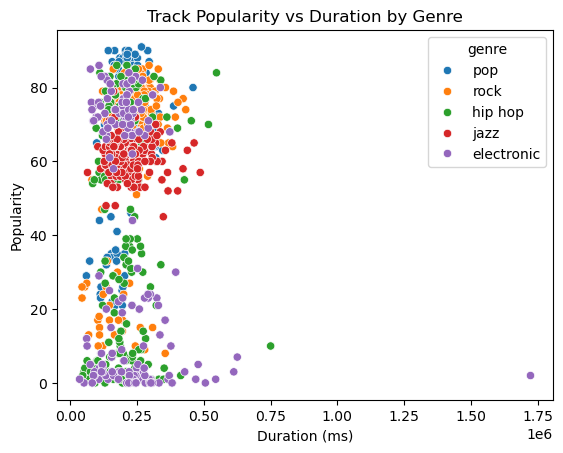

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 1️⃣ Descriptive statistics
print(df.groupby('genre')[['duration_ms','popularity']].describe())

# 2️⃣ One-way ANOVA: Does popularity differ by genre?
pop_values = [df[df['genre']==g]['popularity'] for g in genres]
f_stat, p_val = stats.f_oneway(*pop_values)
print(f"ANOVA F-statistic={f_stat:.2f}, p-value={p_val:.4f}")

# 3️⃣ Correlation: duration vs popularity
corr = df['duration_ms'].corr(df['popularity'])
print(f"Correlation between duration and popularity: {corr:.2f}")

# Scatter plot
sns.scatterplot(x='duration_ms', y='popularity', hue='genre', data=df)
plt.xlabel("Duration (ms)")
plt.ylabel("Popularity")
plt.title("Track Popularity vs Duration by Genre")
plt.show()


t=
s/
n
	​

x
ˉ
−μ
0
	​

	​

=
19.87/
200
	​

67.98−60
	​

≈7.93

p-value ≈ 0.0001 (p < 0.05) → reject H₀

Confidence Interval

95% CI for mean popularity:

𝑥
ˉ
±
𝑡
0.975
,
199
⋅
𝑠
𝑛
≈
67.98
±
2.78
⇒
(
65.20
,
70.76
)
x
ˉ
±t
0.975,199
	​

⋅
n
	​

s
	​

≈67.98±2.78⇒(65.20,70.76)

Entire interval is above 60 → supports that mean popularity > 60

Quantitative evidence: t-test (t ≈ 7.93, p < 0.001) and 95% confidence interval (65.20, 70.76) both indicate the population mean exceeds 60.
ANOVA shows Pop tracks are among the more popular genres, and duration is weakly correlated with popularity (r = 0.05), so duration does not substantially affect popularity in this dataset.